In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters in SI

G=6.6743e-11 #m^3 kg^-1 s^-2
c=3e8 #m/s
h_t=1.054571817e-34 #kg*m^2*s^-2
m_e=9.1093837015e-31 #kg
m_n=1.674927351e-27 #kg
m_sun=1.98855e30 #kg


In [2]:
#define the dimensionless system of differential eqns 

def neutron_star(r, y, w ,z): 
    p ,m  = y  
    if p <= 0: 
        return np.array([0,0])
    dpdr = -m/(r**2)*(p/w)**z
    dmdr = (r**2)*(p/w)**z
    return np.array([dpdr, dmdr])


In [3]:
#RK4 method

def rk4(f, y0, r0, rf, dr, w, z):
    r_values = np.arange(r0, rf, dr)
    y_values = np.zeros((len(r_values), len(y0)))
    y_values[0] = y0
    
    for i in range(1, len(r_values)):
        r = r_values[i - 1]
        y = y_values[i - 1]
        
        k1 = dr * f(r, y, w, z)
        k2 = dr * f(r + dr/2, y + k1/2, w, z)
        k3 = dr * f(r + dr/2, y + k2/2, w, z)
        k4 = dr * f(r + dr, y + k3, w, z)
        
        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return r_values, y_values


In [4]:
#non relativistic constant in the eos p=Knr*e**(5/3)
Knr = h_t**2/(15*np.pi**2*m_n)*(3*np.pi**2/(m_n*c**2))**(5/3)

#inverse of gamma
z= 3/5

In [5]:
#pressure in the centre of the neutron star VARYING
p_c_values = np.linspace(2e30, 4e32, 100)

# Lists to store results
M_stars = []
r_stars = []


# Solve using RK4 FOR MANY POSSIBLE INTERNAL PRESSURES
for p_c in p_c_values:
    
    #matter density in the centre of the neutron star 
    ro_c=(p_c/Knr)**(3/5)*c**(-2) 
    
    #dimensionless param for dimensionless eos
    w = Knr*c**(4/3)*ro_c**(2/3)

    #initial values for the dimensionless system of differential eqns 
    p0=p_c/ro_c*c**(-2) 
    m0 = 0.0    
    y0 = np.array([p0, m0]) 
    r0, rf, dr = 1e-6, 5, 0.0001  
    
    r_values, y_values = rk4(neutron_star, y0, r0, rf, dr, w, z)
    
    #Back to dimensionful quantities

    m_values= y_values[:,1] *4*np.pi*ro_c/(ro_c*4*np.pi*G)**(3/2)*c**3/m_sun
    r_values1=r_values/(ro_c*4*np.pi*G)**(1/2)*c*10**(-3)
    p_values= y_values[:,0]*ro_c*c**2
    
    
    for i in range(len(p_values)):
        if p_values[i]<=0:
            r_stop = r_values1[i]  
            M_star = m_values[i]  
            break  
    

    M_stars.append(M_star)
    r_stars.append(r_stop)
    

M_stars = np.array(M_stars)
r_stars = np.array(r_stars)


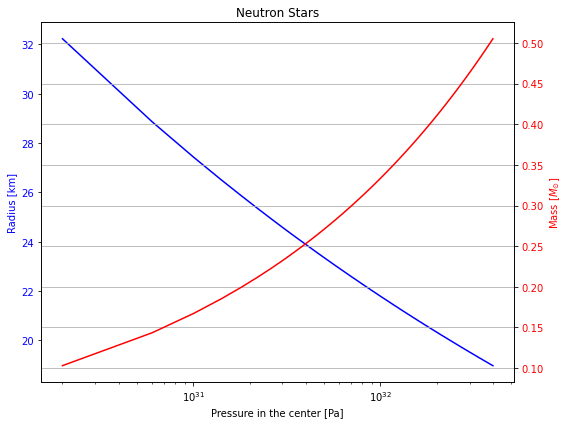

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(p_c_values, r_stars , 'b-', label="Radius[km]")
ax1.set_xlabel("Pressure in the center [Pa]")
ax1.set_ylabel("Radius [km]", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xscale('log')
ax2 = ax1.twinx()  
ax2.plot(p_c_values, M_stars, 'r-', label="Mass [$M_{\odot}$]")
ax2.set_ylabel("Mass [$M_{\odot}$]", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title("Neutron Stars")
fig.tight_layout()
plt.grid()
plt.show()

